In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

df=pd.read_excel("/content/Companies_with_Composite_Scores_and_Rankings.xlsx")
# Select relevant features
features = ["Risk_Score", "Stability_Score", "Profitability_Score", "Growth_Score"]
X = df[features].dropna()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define clustering algorithms
algorithms = {
    "KMeans": KMeans(n_clusters=3, random_state=42, n_init=10),
    "Agglomerative": AgglomerativeClustering(n_clusters=3),
    "GMM": GaussianMixture(n_components=3, random_state=42),
    "DBSCAN": DBSCAN(eps=1.5, min_samples=5)  # eps may need tuning
}

# Store results
results = []

for name, algo in algorithms.items():
    # Fit and predict clusters
    if name == "GMM":
        labels = algo.fit_predict(X_scaled)
    else:
        labels = algo.fit_predict(X_scaled)

    # Only evaluate if >1 cluster
    if len(set(labels)) > 1:
        silhouette = silhouette_score(X_scaled, labels)
        dbi = davies_bouldin_score(X_scaled, labels)
        chi = calinski_harabasz_score(X_scaled, labels)
    else:
        silhouette, dbi, chi = np.nan, np.nan, np.nan

    results.append({
        "Algorithm": name,
        "Silhouette": round(silhouette, 3),
        "Davies-Bouldin": round(dbi, 3),
        "Calinski-Harabasz": round(chi, 3),
        "Clusters Found": len(set(labels))
    })

# Convert to DataFrame for comparison
results_df = pd.DataFrame(results)
print(results_df)


       Algorithm  Silhouette  Davies-Bouldin  Calinski-Harabasz  \
0         KMeans       0.734           0.746           2080.302   
1  Agglomerative       0.900           0.856           1945.190   
2            GMM       0.210           2.373            475.033   
3         DBSCAN       0.868           2.218            807.724   

   Clusters Found  
0               3  
1               3  
2               3  
3               3  


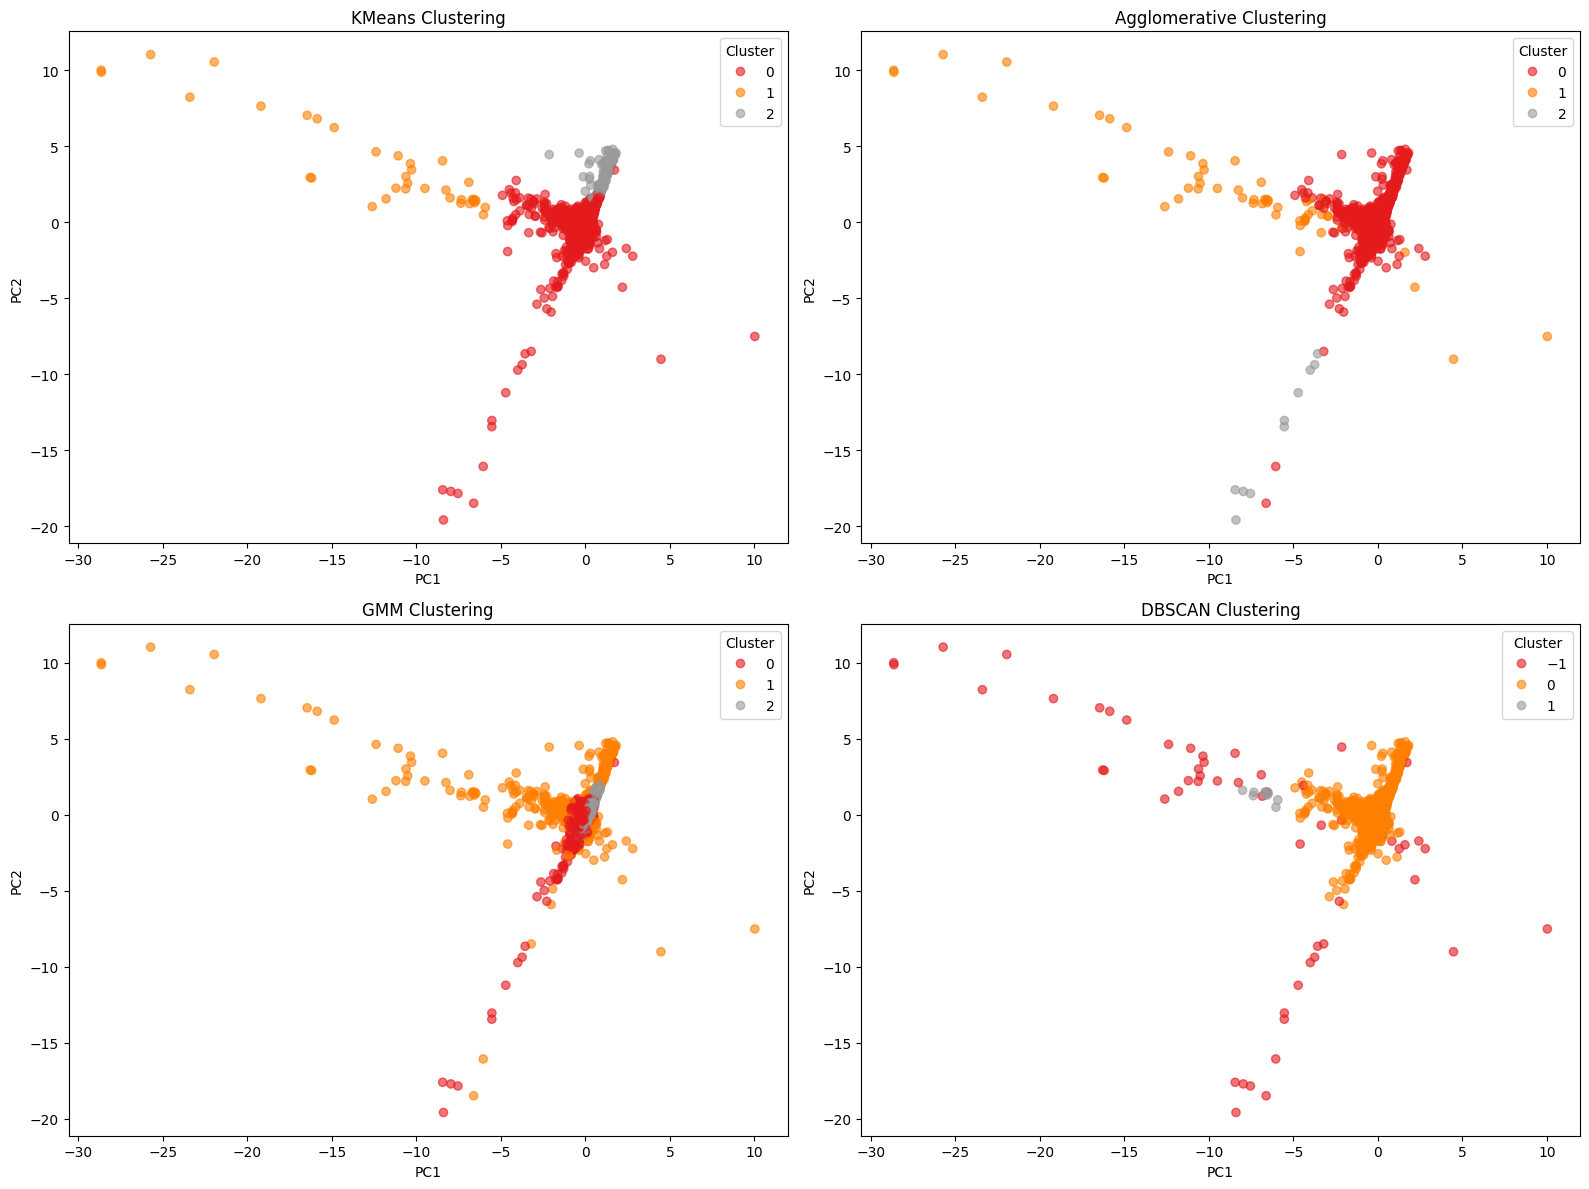

       Algorithm  Silhouette  Davies-Bouldin  Calinski-Harabasz  \
0         KMeans       0.734           0.746           2080.302   
1  Agglomerative       0.900           0.856           1945.190   
2            GMM       0.210           2.373            475.033   
3         DBSCAN       0.868           2.218            807.724   

   Clusters Found  
0               3  
1               3  
2               3  
3               3  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# ==== Step 1: Select and scale features ====
features = ["Risk_Score", "Stability_Score", "Profitability_Score", "Growth_Score"]
X = df[features].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==== Step 2: Define clustering algorithms ====
algorithms = {
    "KMeans": KMeans(n_clusters=3, random_state=42, n_init=10),
    "Agglomerative": AgglomerativeClustering(n_clusters=3),
    "GMM": GaussianMixture(n_components=3, random_state=42),
    "DBSCAN": DBSCAN(eps=1.5, min_samples=5)  # tune eps if needed
}

# ==== Step 3: Fit, evaluate, and visualize ====
results = []
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(16, 12))

for i, (name, algo) in enumerate(algorithms.items(), 1):
    # Fit & predict
    if name == "GMM":
        labels = algo.fit_predict(X_scaled)
    else:
        labels = algo.fit_predict(X_scaled)

    # Compute metrics (if >1 cluster)
    if len(set(labels)) > 1:
        silhouette = silhouette_score(X_scaled, labels)
        dbi = davies_bouldin_score(X_scaled, labels)
        chi = calinski_harabasz_score(X_scaled, labels)
    else:
        silhouette, dbi, chi = np.nan, np.nan, np.nan

    results.append({
        "Algorithm": name,
        "Silhouette": round(silhouette, 3),
        "Davies-Bouldin": round(dbi, 3),
        "Calinski-Harabasz": round(chi, 3),
        "Clusters Found": len(set(labels))
    })

    # ==== Visualization ====
    plt.subplot(2, 2, i)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="Set1", alpha=0.6)
    plt.title(f"{name} Clustering")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend(*scatter.legend_elements(), title="Cluster")

plt.tight_layout()
plt.show()

# ==== Step 4: Show metrics table ====
results_df = pd.DataFrame(results)
print(results_df)


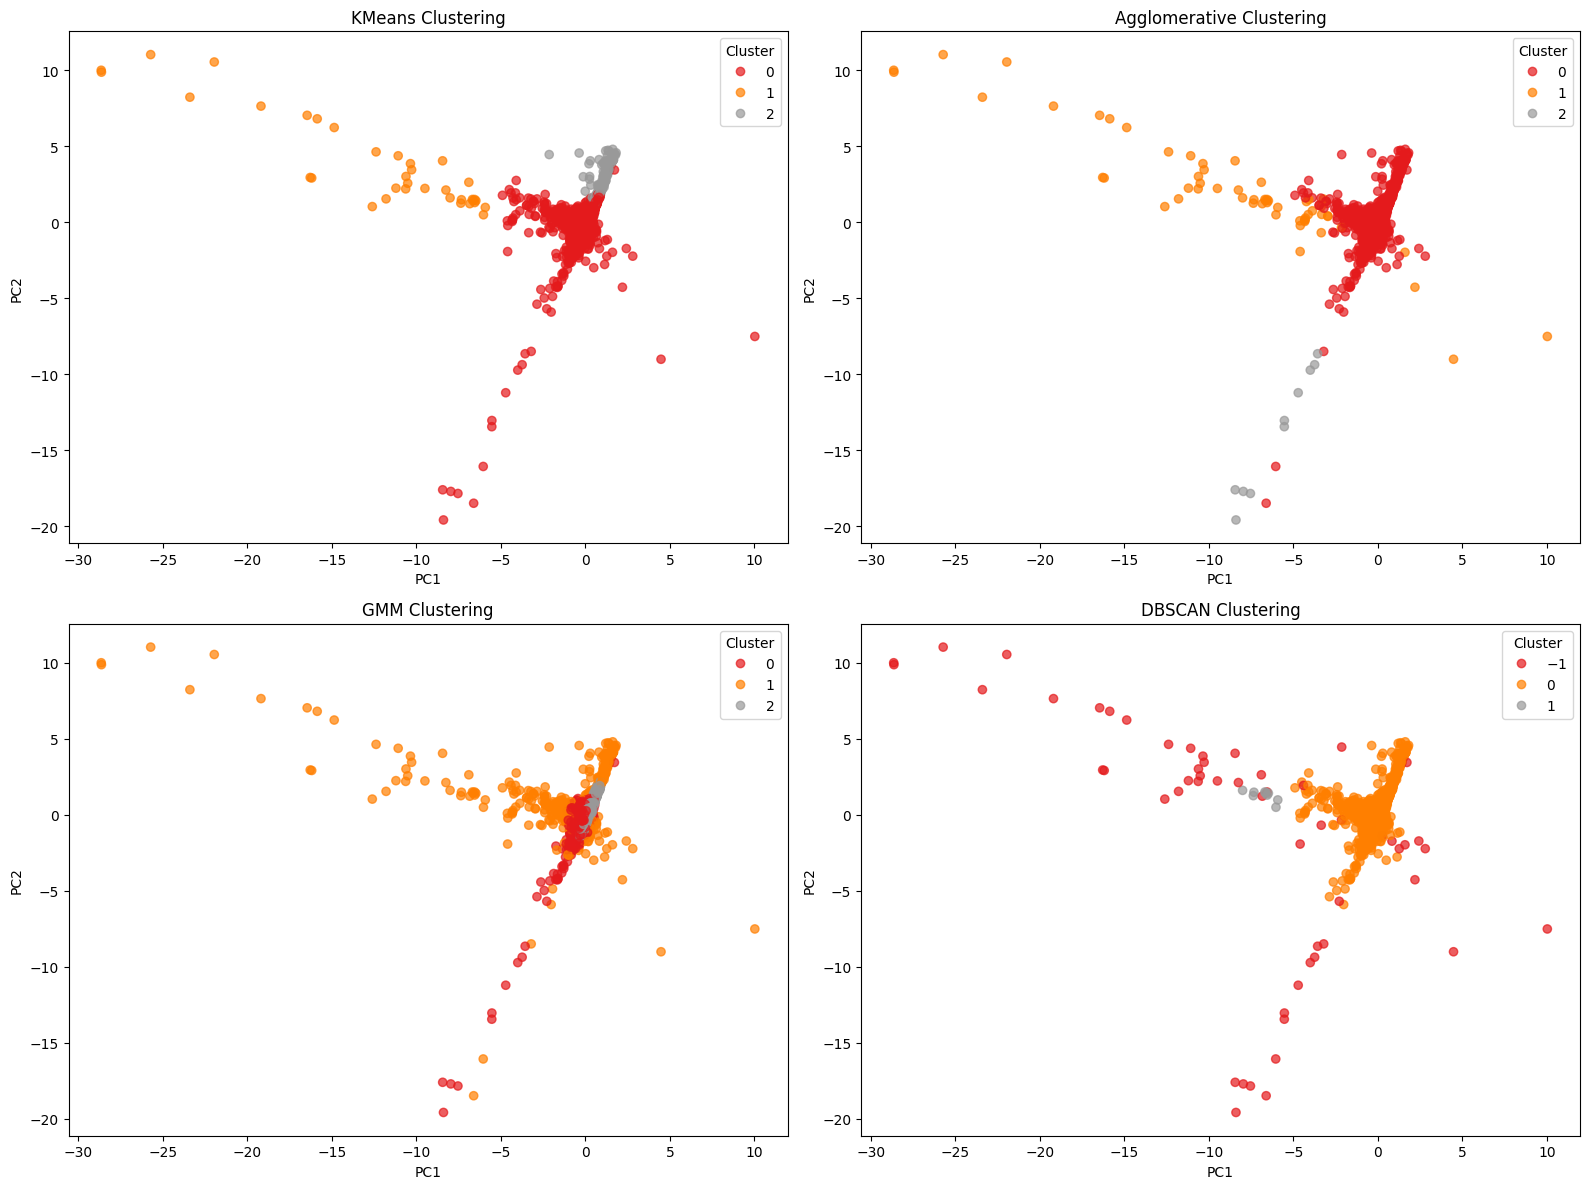


Clustering Metrics:
        Algorithm  Silhouette  Davies-Bouldin  Calinski-Harabasz  \
0         KMeans       0.734           0.746           2080.302   
1  Agglomerative       0.900           0.856           1945.190   
2            GMM       0.210           2.373            475.033   
3         DBSCAN       0.868           2.218            807.724   

   Clusters Found  
0               3  
1               3  
2               3  
3               3  

Risk evaluation for MRF-LTD:

Company KMeans_Risk Agglomerative_Risk GMM_Risk DBSCAN_Risk
mrf-ltd      Medium               High   Medium      Medium
mrf-ltd      Medium               High   Medium      Medium
mrf-ltd      Medium               High   Medium      Medium
mrf-ltd      Medium               High   Medium      Medium
mrf-ltd      Medium               High   Medium      Medium
mrf-ltd      Medium               High   Medium      Medium
mrf-ltd      Medium               High   Medium      Medium
mrf-ltd      Medium            

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# ==== Step 1: Load your dataset ====
df = pd.read_excel("Companies_with_Composite_Scores_and_Rankings.xlsx", sheet_name="Sheet1")

# Select features
features = ["Risk_Score", "Stability_Score", "Profitability_Score", "Growth_Score"]
X = df[features].dropna()

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==== Step 2: Define clustering algorithms ====
algorithms = {
    "KMeans": KMeans(n_clusters=3, random_state=42, n_init=10),
    "Agglomerative": AgglomerativeClustering(n_clusters=3),
    "GMM": GaussianMixture(n_components=3, random_state=42),
    "DBSCAN": DBSCAN(eps=1.5, min_samples=5)
}

results = []
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(16, 12))

# Store cluster labels for each algo
all_labels = {}

# ==== Step 3: Run clustering and evaluate ====
for i, (name, algo) in enumerate(algorithms.items(), 1):
    labels = algo.fit_predict(X_scaled) if name != "GMM" else algo.fit_predict(X_scaled)
    all_labels[name] = labels

    # Compute metrics
    if len(set(labels)) > 1:
        silhouette = silhouette_score(X_scaled, labels)
        dbi = davies_bouldin_score(X_scaled, labels)
        chi = calinski_harabasz_score(X_scaled, labels)
    else:
        silhouette, dbi, chi = None, None, None

    results.append({
        "Algorithm": name,
        "Silhouette": round(silhouette, 3) if silhouette else None,
        "Davies-Bouldin": round(dbi, 3) if dbi else None,
        "Calinski-Harabasz": round(chi, 3) if chi else None,
        "Clusters Found": len(set(labels))
    })

    # ==== Visualization ====
    plt.subplot(2, 2, i)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="Set1", alpha=0.7)
    plt.title(f"{name} Clustering")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend(*scatter.legend_elements(), title="Cluster")

plt.tight_layout()
plt.show()

# ==== Step 4: Metrics table ====
results_df = pd.DataFrame(results)
print("\nClustering Metrics:\n", results_df)

# ==== Step 5: Assign Low/Medium/High Risk for each algo ====
risk_assignments = {}

for name, labels in all_labels.items():
    df[f"{name}_Cluster"] = labels

    if len(set(labels)) > 1 and -1 not in labels:  # meaningful clusters
        cluster_means = df.groupby(f"{name}_Cluster")["Risk_Score"].mean().sort_values()
        mapping = {cluster: level for cluster, level in zip(cluster_means.index, ["Low", "Medium", "High"])}
        df[f"{name}_Risk"] = df[f"{name}_Cluster"].map(mapping)
    else:
        # DBSCAN might give noise (-1), map those as Unknown
        df[f"{name}_Risk"] = df[f"{name}_Cluster"].apply(lambda x: "Unknown" if x == -1 else "Medium")

# ==== Step 6: Extract results for MRF-LTD ====
company_name = "MRF-LTD"
mrf_row = df[df["Company"].str.upper() == company_name.upper()]

if not mrf_row.empty:
    summary = mrf_row[[
        "Company",
        "KMeans_Risk", "Agglomerative_Risk", "GMM_Risk", "DBSCAN_Risk"
    ]]
    print(f"\nRisk evaluation for {company_name}:\n")
    print(summary.to_string(index=False))
else:
    print(f"\n⚠️ Company '{company_name}' not found in dataset!")


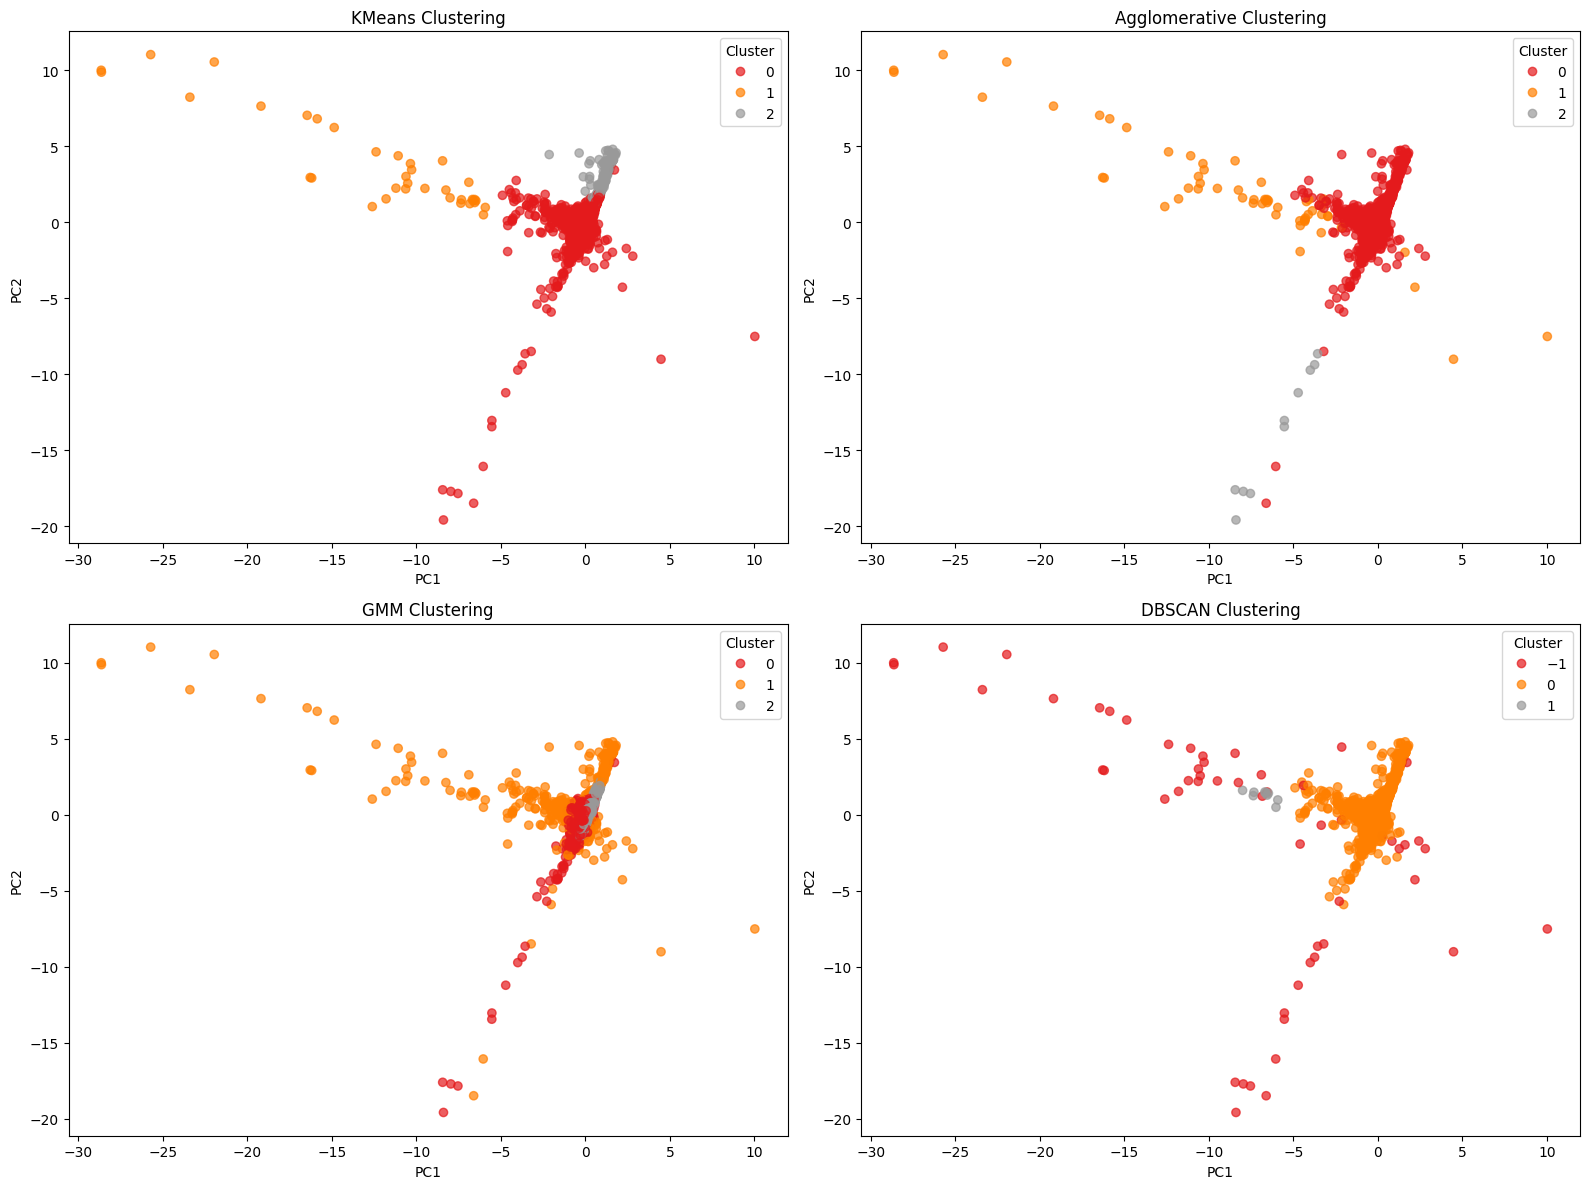


Global Clustering Metrics:
        Algorithm  Silhouette  Davies-Bouldin  Calinski-Harabasz  \
0         KMeans       0.734           0.746           2080.302   
1  Agglomerative       0.900           0.856           1945.190   
2            GMM       0.210           2.373            475.033   
3         DBSCAN       0.868           2.218            807.724   

   Clusters Found  
0               3  
1               3  
2               3  
3               3  

Risk evaluation for MRF-LTD:

Actual_Risk KMeans Agglomerative    GMM DBSCAN
     Medium Medium          High Medium Medium


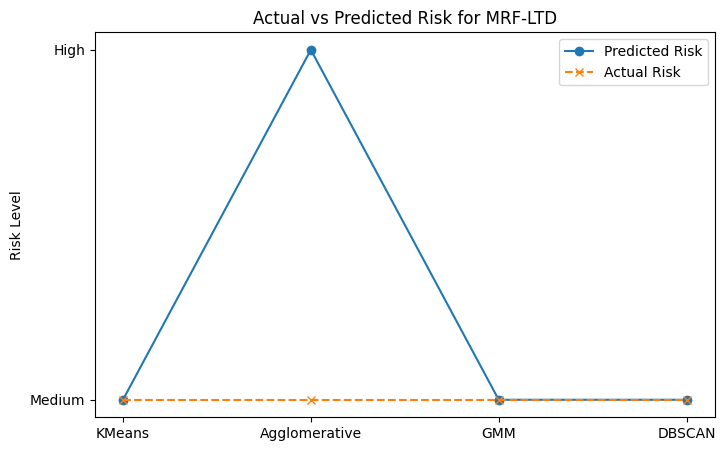

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# ==== Step 1: Load your dataset ====
df = pd.read_excel("Companies_with_Composite_Scores_and_Rankings.xlsx", sheet_name="Sheet1")

# Select features
features = ["Risk_Score", "Stability_Score", "Profitability_Score", "Growth_Score"]
X = df[features].dropna()

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==== Step 2: Define clustering algorithms ====
algorithms = {
    "KMeans": KMeans(n_clusters=3, random_state=42, n_init=10),
    "Agglomerative": AgglomerativeClustering(n_clusters=3),
    "GMM": GaussianMixture(n_components=3, random_state=42),
    "DBSCAN": DBSCAN(eps=1.5, min_samples=5)
}

results = []
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(16, 12))

# Store cluster labels for each algo
all_labels = {}

# ==== Step 3: Run clustering and evaluate ====
for i, (name, algo) in enumerate(algorithms.items(), 1):
    labels = algo.fit_predict(X_scaled) if name != "GMM" else algo.fit_predict(X_scaled)
    all_labels[name] = labels

    # Compute metrics
    if len(set(labels)) > 1:
        silhouette = silhouette_score(X_scaled, labels)
        dbi = davies_bouldin_score(X_scaled, labels)
        chi = calinski_harabasz_score(X_scaled, labels)
    else:
        silhouette, dbi, chi = None, None, None

    results.append({
        "Algorithm": name,
        "Silhouette": round(silhouette, 3) if silhouette else None,
        "Davies-Bouldin": round(dbi, 3) if dbi else None,
        "Calinski-Harabasz": round(chi, 3) if chi else None,
        "Clusters Found": len(set(labels))
    })

    # ==== Visualization ====
    plt.subplot(2, 2, i)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="Set1", alpha=0.7)
    plt.title(f"{name} Clustering")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend(*scatter.legend_elements(), title="Cluster")

plt.tight_layout()
plt.show()

# ==== Step 4: Metrics table (Global) ====
results_df = pd.DataFrame(results)
print("\nGlobal Clustering Metrics:\n", results_df)

# ==== Step 5: Assign Low/Medium/High Risk for each algo ====
risk_assignments = {}

for name, labels in all_labels.items():
    df[f"{name}_Cluster"] = labels

    if len(set(labels)) > 1 and -1 not in labels:  # meaningful clusters
        cluster_means = df.groupby(f"{name}_Cluster")["Risk_Score"].mean().sort_values()
        mapping = {cluster: level for cluster, level in zip(cluster_means.index, ["Low", "Medium", "High"])}
        df[f"{name}_Risk"] = df[f"{name}_Cluster"].map(mapping)
    else:
        df[f"{name}_Risk"] = df[f"{name}_Cluster"].apply(lambda x: "Unknown" if x == -1 else "Medium")

# ==== Step 6: Extract results for MRF-LTD ====
company_name = "MRF-LTD"
mrf_row = df[df["Company"].str.upper() == company_name.upper()]

if not mrf_row.empty:
    # Create true risk level (based on Risk_Score thresholds)
    score = mrf_row["Risk_Score"].values[0]
    if score < df["Risk_Score"].quantile(0.33):
        actual_risk = "Low"
    elif score < df["Risk_Score"].quantile(0.66):
        actual_risk = "Medium"
    else:
        actual_risk = "High"

    mrf_summary = {
        "Actual_Risk": actual_risk,
        "KMeans": mrf_row["KMeans_Risk"].values[0],
        "Agglomerative": mrf_row["Agglomerative_Risk"].values[0],
        "GMM": mrf_row["GMM_Risk"].values[0],
        "DBSCAN": mrf_row["DBSCAN_Risk"].values[0]
    }

    mrf_metrics = pd.DataFrame([mrf_summary])
    print(f"\nRisk evaluation for {company_name}:\n")
    print(mrf_metrics.to_string(index=False))

    # ==== Step 7: Visualization Actual vs Predicted ====
    plt.figure(figsize=(8, 5))
    methods = ["KMeans", "Agglomerative", "GMM", "DBSCAN"]
    predicted = [mrf_metrics[m].values[0] for m in methods]
    actual = [actual_risk] * len(methods)

    plt.plot(methods, predicted, marker="o", label="Predicted Risk")
    plt.plot(methods, actual, marker="x", linestyle="--", label="Actual Risk")
    plt.title(f"Actual vs Predicted Risk for {company_name}")
    plt.ylabel("Risk Level")
    plt.legend()
    plt.show()

else:
    print(f"\n⚠️ Company '{company_name}' not found in dataset!")


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering

linkages = ["ward", "complete", "average"]  # try main options
cluster_range = 3  # try 2-5 clusters

best_score = -1
best_params = None
results_tune = []

for linkage in linkages:

        algo = AgglomerativeClustering(3, linkage=linkage)
        labels = algo.fit_predict(X_scaled)

        if len(set(labels)) > 1:
            sil = silhouette_score(X_scaled, labels)
            dbi = davies_bouldin_score(X_scaled, labels)
            chi = calinski_harabasz_score(X_scaled, labels)
        else:
            sil, dbi, chi = None, None, None

        results_tune.append({
            "Linkage": linkage,
            "n_clusters": 3,
            "Silhouette": round(sil, 3) if sil else None,
            "Davies-Bouldin": round(dbi, 3) if dbi else None,
            "Calinski-Harabasz": round(chi, 3) if chi else None
        })

        # Track best silhouette
        if sil and sil > best_score:
            best_score = sil
            best_params = {"linkage": linkage, "n_clusters":3}

# Display tuning results
results_tune_df = pd.DataFrame(results_tune)
print("Agglomerative Clustering Tuning Results:\n", results_tune_df)
print(f"\n✅ Best Params based on Silhouette: {best_params} with score {best_score:.3f}")


Agglomerative Clustering Tuning Results:
     Linkage  n_clusters  Silhouette  Davies-Bouldin  Calinski-Harabasz
0      ward           3       0.900           0.856           1945.190
1  complete           3       0.942           0.514            975.975
2   average           3       0.952           0.216            943.113

✅ Best Params based on Silhouette: {'linkage': 'average', 'n_clusters': 3} with score 0.952


Agglomerative Clustering Metrics (average linkage):
Silhouette Score: 0.952
Davies-Bouldin Index: 0.216
Calinski-Harabasz Index: 943.113


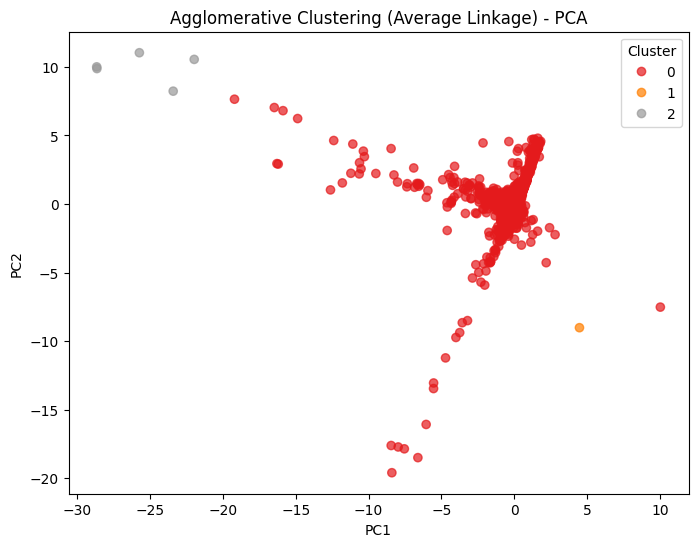


MRF-LTD Risk Evaluation:
Actual Risk (based on Risk_Score quantiles): Low
Predicted Risk (Agglomerative - average linkage): High


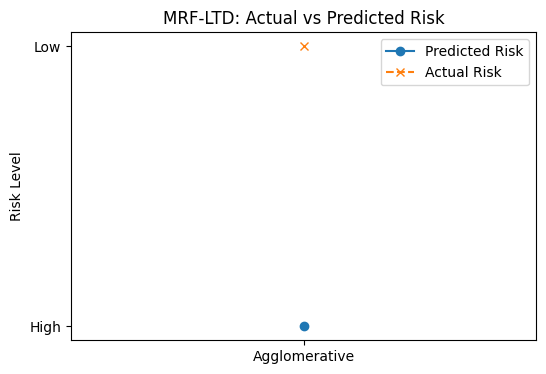

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# ==== Step 1: Load dataset ====
df = pd.read_excel("Companies_with_Composite_Scores_and_Rankings.xlsx", sheet_name="Sheet1")

# Select features
features = ["Risk_Score", "Stability_Score", "Profitability_Score", "Growth_Score"]
X = df[features].dropna()

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==== Step 2: Agglomerative Clustering (average linkage) ====
n_clusters = 3
agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage="average")
labels = agglo.fit_predict(X_scaled)

# Add cluster labels to dataframe
df["Agglomerative_Cluster"] = labels

# ==== Step 3: Compute metrics ====
silhouette = silhouette_score(X_scaled, labels)
dbi = davies_bouldin_score(X_scaled, labels)
chi = calinski_harabasz_score(X_scaled, labels)

print("Agglomerative Clustering Metrics (average linkage):")
print(f"Silhouette Score: {silhouette:.3f}")
print(f"Davies-Bouldin Index: {dbi:.3f}")
print(f"Calinski-Harabasz Index: {chi:.3f}")

# ==== Step 4: Assign Low/Medium/High Risk ====
cluster_means = df.groupby("Agglomerative_Cluster")["Risk_Score"].mean().sort_values()
risk_mapping = {cluster: level for cluster, level in zip(cluster_means.index, ["Low", "Medium", "High"])}
df["Agglomerative_Risk"] = df["Agglomerative_Cluster"].map(risk_mapping)

# ==== Step 5: PCA for visualization ====
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap="Set1", alpha=0.7)
plt.title("Agglomerative Clustering (Average Linkage) - PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()

# ==== Step 6: Check clustering for MRF-LTD ====
company_name = "NHPC-LTD"
mrf_row = df[df["Company"].str.upper() == company_name.upper()]

if not mrf_row.empty:
    score = mrf_row["Risk_Score"].values[0]
    if score < df["Risk_Score"].quantile(0.33):
        actual_risk = "Low"
    elif score < df["Risk_Score"].quantile(0.66):
        actual_risk = "Medium"
    else:
        actual_risk = "High"

    predicted_risk = mrf_row["Agglomerative_Risk"].values[0]

    print(f"\nMRF-LTD Risk Evaluation:")
    print(f"Actual Risk (based on Risk_Score quantiles): {actual_risk}")
    print(f"Predicted Risk (Agglomerative - average linkage): {predicted_risk}")

    # Visualization
    plt.figure(figsize=(6,4))
    plt.plot(["Agglomerative"], [predicted_risk], marker="o", label="Predicted Risk")
    plt.plot(["Agglomerative"], [actual_risk], marker="x", linestyle="--", label="Actual Risk")
    plt.title(f"MRF-LTD: Actual vs Predicted Risk")
    plt.ylabel("Risk Level")
    plt.legend()
    plt.show()

else:
    print(f"⚠️ Company '{company_name}' not found in dataset!")


Agglomerative Clustering Metrics (average linkage, 3 clusters):
Silhouette Score: 0.966
Davies-Bouldin Index: 0.338
Calinski-Harabasz Index: 957.672


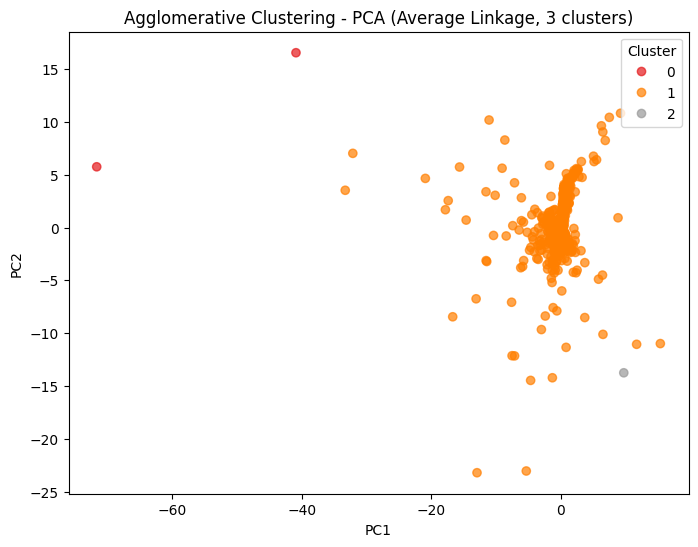


MRF-LTD Risk Evaluation:
Actual Risk (quantile-based): Low
Predicted Risk (Agglomerative): High


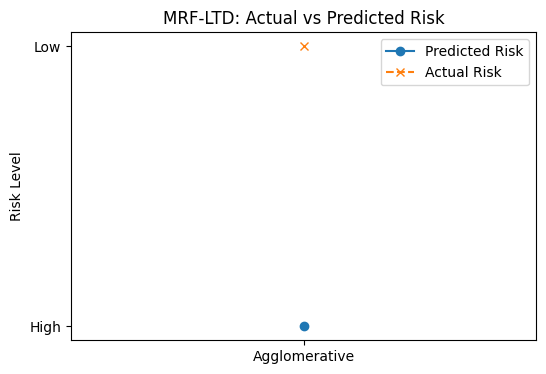

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# ==== Step 1: Load dataset ====
df = pd.read_excel("Companies_with_Composite_Scores_and_Rankings.xlsx", sheet_name="Sheet1")

# ==== Step 2: Feature engineering ====
# Original features
features = ["Risk_Score", "Stability_Score", "Profitability_Score", "Growth_Score"]

# Add interaction/composite features
df["Profitability_Growth"] = df["Profitability_Score"] * df["Growth_Score"]
df["Risk_Stability"] = df["Risk_Score"] * df["Stability_Score"]

# Final feature set
features_updated = features + ["Profitability_Growth", "Risk_Stability"]

X = df[features_updated].dropna()

# ==== Step 3: Standardize ====
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==== Step 4: Apply Agglomerative Clustering (average linkage, 3 clusters) ====
n_clusters = 3
agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage="average")
labels = agglo.fit_predict(X_scaled)
df["Agglomerative_Cluster"] = labels

# ==== Step 5: Compute metrics ====
silhouette = silhouette_score(X_scaled, labels)
dbi = davies_bouldin_score(X_scaled, labels)
chi = calinski_harabasz_score(X_scaled, labels)

print("Agglomerative Clustering Metrics (average linkage, 3 clusters):")
print(f"Silhouette Score: {silhouette:.3f}")
print(f"Davies-Bouldin Index: {dbi:.3f}")
print(f"Calinski-Harabasz Index: {chi:.3f}")

# ==== Step 6: Assign Low/Medium/High Risk ====
cluster_means = df.groupby("Agglomerative_Cluster")["Risk_Score"].mean().sort_values()
risk_mapping = {cluster: level for cluster, level in zip(cluster_means.index, ["Low", "Medium", "High"])}
df["Agglomerative_Risk"] = df["Agglomerative_Cluster"].map(risk_mapping)

# ==== Step 7: PCA for visualization ====
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap="Set1", alpha=0.7)
plt.title(f"Agglomerative Clustering - PCA (Average Linkage, 3 clusters)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()

# ==== Step 8: Check clustering for MRF-LTD ====
company_name = "NHPC-LTD"
mrf_row = df[df["Company"].str.upper() == company_name.upper()]

if not mrf_row.empty:
    score = mrf_row["Risk_Score"].values[0]
    if score < df["Risk_Score"].quantile(0.33):
        actual_risk = "Low"
    elif score < df["Risk_Score"].quantile(0.66):
        actual_risk = "Medium"
    else:
        actual_risk = "High"

    predicted_risk = mrf_row["Agglomerative_Risk"].values[0]

    print(f"\nMRF-LTD Risk Evaluation:")
    print(f"Actual Risk (quantile-based): {actual_risk}")
    print(f"Predicted Risk (Agglomerative): {predicted_risk}")

    plt.figure(figsize=(6,4))
    plt.plot(["Agglomerative"], [predicted_risk], marker="o", label="Predicted Risk")
    plt.plot(["Agglomerative"], [actual_risk], marker="x", linestyle="--", label="Actual Risk")
    plt.title(f"MRF-LTD: Actual vs Predicted Risk")
    plt.ylabel("Risk Level")
    plt.legend()
    plt.show()

else:
    print(f"⚠️ Company '{company_name}' not found in dataset!")


Agglomerative Clustering Metrics (average linkage, 3 clusters):
Silhouette Score: 0.898
Davies-Bouldin Index: 0.134
Calinski-Harabasz Index: 413.995


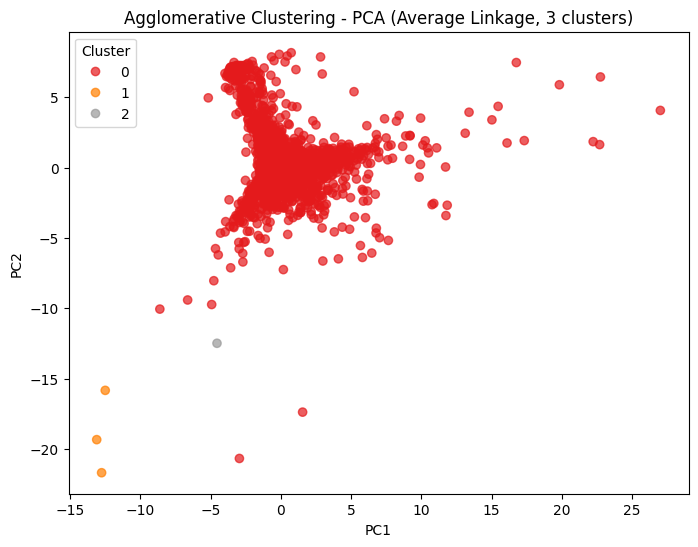

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# ==== Step 1: Load dataset ====
df = pd.read_excel("/content/Companies_Final_Composite_Scores (1).xlsx")

# ==== Step 2: Feature engineering ====
features = ["Risk_Score", "Stability_Score", "Profitability_Score", "Growth_Score"]
df["Profitability_Growth"] = df["Profitability_Score"] * df["Growth_Score"]
df["Risk_Stability"] = df["Risk_Score"] * df["Stability_Score"]
features_updated = features + ["Profitability_Growth", "Risk_Stability"]

X = df[features_updated].dropna()

# ==== Step 3: Standardize ====
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==== Step 4: Agglomerative Clustering (average linkage, 3 clusters) ====
n_clusters = 3
agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage="average")
labels = agglo.fit_predict(X_scaled)
df["Agglomerative_Cluster"] = labels

# ==== Step 5: Compute metrics ====
silhouette = silhouette_score(X_scaled, labels)
dbi = davies_bouldin_score(X_scaled, labels)
chi = calinski_harabasz_score(X_scaled, labels)

print("Agglomerative Clustering Metrics (average linkage, 3 clusters):")
print(f"Silhouette Score: {silhouette:.3f}")
print(f"Davies-Bouldin Index: {dbi:.3f}")
print(f"Calinski-Harabasz Index: {chi:.3f}")

# ==== Step 6: Safe function to assign Low/Medium/High risk within each cluster ====
def safe_qcut(series):
    unique_vals = series.nunique()
    if unique_vals == 1:
        return pd.Series(["Medium"] * len(series), index=series.index)
    elif unique_vals == 2:
        return pd.qcut(series, 2, labels=["Low","High"])
    else:
        return pd.qcut(series, 3, labels=["Low","Medium","High"])

df["Agglomerative_Risk"] = df.groupby("Agglomerative_Cluster")["Risk_Score"].transform(safe_qcut)

# ==== Step 7: PCA visualization ====
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap="Set1", alpha=0.7)
plt.title(f"Agglomerative Clustering - PCA (Average Linkage, 3 clusters)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()





MRF-LTD Risk Evaluation:
Actual Risk (quantile-based): Medium
Predicted Risk (Agglomerative, cluster-adjusted): Medium


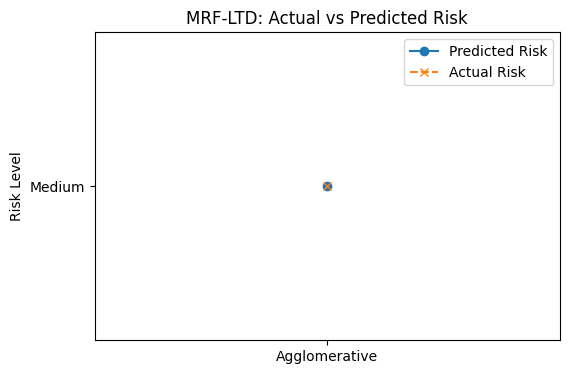

In [ ]:
company_name = "AFFLE-INDIA-LTD"
mrf_row = df[df["Company"].str.upper() == company_name.upper()]

if not mrf_row.empty:
    score = mrf_row["Risk_Score"].values[0]
    if score < df["Risk_Score"].quantile(0.33):
        actual_risk = "Low"
    elif score < df["Risk_Score"].quantile(0.66):
        actual_risk = "Medium"
    else:
        actual_risk = "High"

    predicted_risk = mrf_row["Agglomerative_Risk"].values[0]

    print(f"\nMRF-LTD Risk Evaluation:")
    print(f"Actual Risk (quantile-based): {actual_risk}")
    print(f"Predicted Risk (Agglomerative, cluster-adjusted): {predicted_risk}")

    # Visualization
    plt.figure(figsize=(6,4))
    plt.plot(["Agglomerative"], [predicted_risk], marker="o", label="Predicted Risk")
    plt.plot(["Agglomerative"], [actual_risk], marker="x", linestyle="--", label="Actual Risk")
    plt.title(f"MRF-LTD: Actual vs Predicted Risk")
    plt.ylabel("Risk Level")
    plt.legend()
    plt.show()

else:
    print(f"⚠️ Company '{company_name}' not found in dataset!")


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# =======================
# 1. Preprocessing
# =======================
df = pd.read_excel("/content/Companies_Final_Composite_Scores (1).xlsx")

# Encode Sector if exists
if "Sector" in df.columns:
    le = LabelEncoder()
    df["Sector"] = le.fit_transform(df["Sector"].astype(str))

# Sort by company + date
df = df.sort_values(["Company", "FiscalDate"])

# Drop identifiers from features
non_features = ["Company", "FiscalDate"]
targets = ["Risk_Score", "Growth_Score", "Profitability_Score",
           "Stability_Score", "Sector_Score", "Overall_Score"]
features = [c for c in df.columns if c not in non_features + targets]

# Lag features for XGBoost
def add_lags(data, lags=3):
    for col in targets:
        for lag in range(1, lags+1):
            data[f"{col}_lag{lag}"] = data.groupby("Company")[col].shift(lag)
    return data

df = add_lags(df, lags=3).dropna()

# Train/Val/Test split
train = df[df["FiscalDate"] <= "2023-06-01"]
val = df[(df["FiscalDate"] >= "2023-09-01") & (df["FiscalDate"] <= "2024-06-01")]
test = df[df["FiscalDate"] >= "2024-09-01"]

# =======================
# 2. LSTM Dataset + Model
# =======================
SEQ_LEN = 4

class TimeSeriesDataset(Dataset):
    def __init__(self, data, seq_len=SEQ_LEN):
        self.X, self.y = [], []
        for company, group in data.groupby("Company"):
            group = group.sort_values("FiscalDate")
            vals = group[features + targets].values
            for i in range(len(group) - seq_len):
                self.X.append(vals[i:i+seq_len, :-len(targets)])
                self.y.append(vals[i+seq_len, -len(targets):])
        self.X = np.array(self.X, dtype=np.float32)
        self.y = np.array(self.y, dtype=np.float32)

    def __len__(self): return len(self.X)
    def __getitem__(self, idx): return self.X[idx], self.y[idx]

train_ds, val_ds, test_ds = TimeSeriesDataset(train), TimeSeriesDataset(val), TimeSeriesDataset(test)
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=64)

class LSTMModel(nn.Module):
    def __init__(self, n_features, n_targets, hidden=64, layers=2):
        super().__init__()
        self.lstm = nn.LSTM(n_features, hidden, layers, batch_first=True)
        self.fc = nn.Linear(hidden, n_targets)

    def forward(self, x):
        _, (h, _) = self.lstm(x)
        return self.fc(h[-1])

device = torch.device("cpu")
model = LSTMModel(len(features), len(targets)).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Train loop (simplified)
for epoch in range(5):  # increase epochs
    model.train()
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        loss = criterion(model(xb), yb)
        loss.backward()
        optimizer.step()

# =======================
# 3. XGBoost Models
# =======================
xgb_models = {}
for target in targets:
    dtrain = xgb.DMatrix(train[features + [f"{t}_lag1" for t in targets] +
                                  [f"{t}_lag2" for t in targets] +
                                  [f"{t}_lag3" for t in targets]],
                         label=train[target])
    dval = xgb.DMatrix(val[features + [f"{t}_lag1" for t in targets] +
                                [f"{t}_lag2" for t in targets] +
                                [f"{t}_lag3" for t in targets]],
                       label=val[target])
    params = {"objective":"reg:squarederror", "max_depth":5, "eta":0.1}
    xgb_model = xgb.train(params, dtrain, num_boost_round=200, evals=[(dval,"val")], early_stopping_rounds=20, verbose_eval=False)
    xgb_models[target] = xgb_model

# =======================
# 4. Ensemble Blending (Ridge)
# =======================
def get_preds_lstm(loader):
    model.eval()
    preds, true = [], []
    with torch.no_grad():
        for xb, yb in loader:
            preds.append(model(xb.to(device)).cpu().numpy())
            true.append(yb.numpy())
    return np.vstack(preds), np.vstack(true)

lstm_val_preds, y_val_true = get_preds_lstm(val_loader)
lstm_test_preds, y_test_true = get_preds_lstm(DataLoader(test_ds, batch_size=64))

xgb_val_preds = []
xgb_test_preds = []
for i, target in enumerate(targets):
    val_dmatrix = xgb.DMatrix(val[features + [f"{t}_lag1" for t in targets] +
                                        [f"{t}_lag2" for t in targets] +
                                        [f"{t}_lag3" for t in targets]])
    test_dmatrix = xgb.DMatrix(test[features + [f"{t}_lag1" for t in targets] +
                                          [f"{t}_lag2" for t in targets] +
                                          [f"{t}_lag3" for t in targets]])
    xgb_val_preds.append(xgb_models[target].predict(val_dmatrix))
    xgb_test_preds.append(xgb_models[target].predict(test_dmatrix))

xgb_val_preds = np.vstack(xgb_val_preds).T
xgb_test_preds = np.vstack(xgb_test_preds).T

# Blend with Ridge
meta = Ridge(alpha=1.0)
meta.fit(np.hstack([lstm_val_preds, xgb_val_preds]), y_val_true)
final_preds = meta.predict(np.hstack([lstm_test_preds, xgb_test_preds]))

# =======================
# 5. Evaluation
# =======================
for i, target in enumerate(targets):
    rmse = mean_squared_error(y_test_true[:,i], final_preds[:,i], squared=False)
    r2 = r2_score(y_test_true[:,i], final_preds[:,i])
    print(f"{target}: RMSE={rmse:.4f}, R²={r2:.3f}")


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 20 and the array at index 1 has size 898